# **Ch 9 - Model Inference**

In [1]:
import joblib
import pandas as pd


In [2]:
# Load the saved model
model_filename = "svm_churn_model.pkl"
loaded_model = joblib.load(model_filename)

print("Model loaded successfully!")


Model loaded successfully!


generate synthetic data for inference

In [ ]:
# Generate multiple inference samples with diverse customer profiles
inference_data = pd.DataFrame([
    {"Device Used Most Often": "Tablet", "Genre Preference": "Action", "Region": "North America", 
     "Payment History (On-Time/Delayed)": "On-Time", "Subscription Plan": "Premium", "Promotional Offers Used": 2, 
     "Subscription Length (Months)": 12, "Customer Satisfaction Score (1-10)": 8, "Daily Watch Time (Hours)": 3.5, 
     "Engagement Rate (1-10)": 7, "Support Queries Logged": 1, "Age": 35, "Monthly Income ($)": 5000, "Number of Profiles Created": 3},

    {"Device Used Most Often": "Smart TV", "Genre Preference": "Comedy", "Region": "Europe", 
     "Payment History (On-Time/Delayed)": "Delayed", "Subscription Plan": "Basic", "Promotional Offers Used": 0, 
     "Subscription Length (Months)": 6, "Customer Satisfaction Score (1-10)": 5, "Daily Watch Time (Hours)": 2.0, 
     "Engagement Rate (1-10)": 5, "Support Queries Logged": 2, "Age": 28, "Monthly Income ($)": 3500, "Number of Profiles Created": 2},

    {"Device Used Most Often": "Mobile", "Genre Preference": "Drama", "Region": "Asia", 
     "Payment History (On-Time/Delayed)": "On-Time", "Subscription Plan": "Standard", "Promotional Offers Used": 1, 
     "Subscription Length (Months)": 24, "Customer Satisfaction Score (1-10)": 9, "Daily Watch Time (Hours)": 5.0, 
     "Engagement Rate (1-10)": 9, "Support Queries Logged": 0, "Age": 22, "Monthly Income ($)": 2500, "Number of Profiles Created": 1},

    {"Device Used Most Often": "Laptop", "Genre Preference": "Horror", "Region": "South America", 
     "Payment History (On-Time/Delayed)": "Delayed", "Subscription Plan": "Standard", "Promotional Offers Used": 3, 
     "Subscription Length (Months)": 18, "Customer Satisfaction Score (1-10)": 6, "Daily Watch Time (Hours)": 4.5, 
     "Engagement Rate (1-10)": 6, "Support Queries Logged": 3, "Age": 40, "Monthly Income ($)": 4500, "Number of Profiles Created": 4},

    {"Device Used Most Often": "Desktop", "Genre Preference": "Sci-Fi", "Region": "Australia", 
     "Payment History (On-Time/Delayed)": "On-Time", "Subscription Plan": "Premium", "Promotional Offers Used": 4, 
     "Subscription Length (Months)": 36, "Customer Satisfaction Score (1-10)": 10, "Daily Watch Time (Hours)": 6.0, 
     "Engagement Rate (1-10)": 10, "Support Queries Logged": 0, "Age": 30, "Monthly Income ($)": 6000, "Number of Profiles Created": 5}
])

# Save the inference data to a CSV file
inference_data.to_csv("batch_inference_data.csv", index=False)



In [7]:
# Load inference data
inference_df = pd.read_csv("batch_inference_data.csv")

inference_df

,Device Used Most Often,Genre Preference,Region,Payment History (On-Time/Delayed),Subscription Plan,Promotional Offers Used,Subscription Length (Months),Customer Satisfaction Score (1-10),Daily Watch Time (Hours),Engagement Rate (1-10),Support Queries Logged,Age,Monthly Income ($),Number of Profiles Created
0,Tablet,Action,North America,On-Time,Premium,2,12,8,3.5,7,1,35,5000,3
1,Smart TV,Comedy,Europe,Delayed,Basic,0,6,5,2.0,5,2,28,3500,2
2,Mobile,Drama,Asia,On-Time,Standard,1,24,9,5.0,9,0,22,2500,1
3,Laptop,Horror,South America,Delayed,Standard,3,18,6,4.5,6,3,40,4500,4
4,Desktop,Sci-Fi,Australia,On-Time,Premium,4,36,10,6.0,10,0,30,6000,5


In [9]:
# Ensure all categorical columns are strings
categorical_cols = ['Device Used Most Often', 'Genre Preference', 'Region', 
                    'Payment History (On-Time/Delayed)', 'Subscription Plan', 
                    'Promotional Offers Used']
inference_df[categorical_cols] = inference_df[categorical_cols].astype(str)

# Make predictions using the raw inference data
predictions = loaded_model.predict(inference_df)

# Append predictions to the dataframe
inference_df["Churn Prediction"] = predictions

# Display results
print(inference_df[["Churn Prediction"]])


   Churn Prediction
0                 0
1                 1
2                 0
3                 1
4                 0


The model successfully predict the new raw inference data.

In [10]:
print(inference_df["Churn Prediction"].value_counts())


Churn Prediction
0    3
1    2
Name: count, dtype: int64


The model predict 3 not churn 2 churn for the trial synthetic data inference.

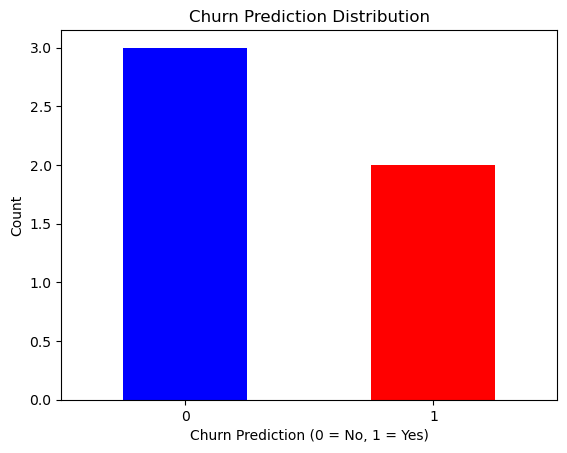

In [ ]:
# Plot churn distribution
inference_df["Churn Prediction"].value_counts().plot(kind="bar", color=["blue", "red"])
plt.xlabel("Churn Prediction (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Churn Prediction Distribution")
plt.xticks(rotation=0)
plt.show()


### **Churn Prediction Distribution Interpretation**

The bar chart visualizes the distribution of predicted churn outcomes based on the inference dataset. Below are the key takeaways:

#### **1. Two Categories of Predictions**
- **0 (Blue Bar)**: Represents customers predicted **not to churn**.
- **1 (Red Bar)**: Represents customers predicted **to churn**.

#### **2. Proportion of Predictions**
- The **blue bar is taller than the red bar**, meaning more customers are predicted to remain subscribed than to churn.
- Specifically, **3 customers are predicted to stay (0), while 2 are predicted to churn (1)**.

- Further analysis is recommended to **identify key factors influencing churn**, such as engagement levels, customer satisfaction scores, and subscription plans.

By understanding the churn predictions, the business can make data-driven decisions to enhance customer retention and long-term profitability.
